In [37]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt # matplotlibの描画系
import math

# Each Function are at different Part
from WarpFunction import *
from PhaseCorrelation import *
from POC import *



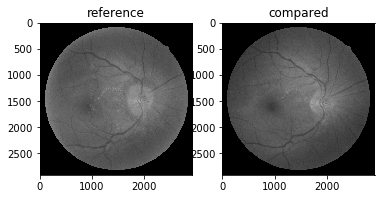

In [6]:
Ref = cv2.imread("FIRE/Images/A01_1.jpg",0)
Compared = cv2.imread("FIRE/Images/A01_2.jpg",0)

# show two image
plt.subplot(1,2,1)
plt.imshow(Ref,cmap='gray')
plt.title('reference')
plt.subplot(1,2,2)
plt.imshow(Compared,cmap="gray")
plt.title('compared')


ValueError: zero-size array to reduction operation maximum which has no identity

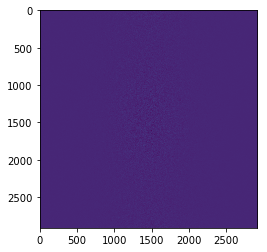

In [8]:
value  = POC(Ref,Compared)

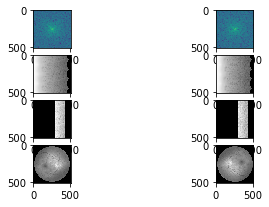

In [96]:
# resize
origY,origX = Ref.shape
nS = 512

sref = cv2.resize(Ref,(nS,nS))
scomp = cv2.resize(Compared,(nS,nS))
# transfer 
sref = np.float64(sref)
scomp = np.float64(scomp)

displacement  = POC(sref,scomp)

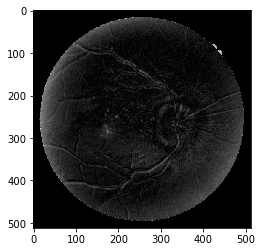

In [112]:
displacement
scc = cv2.warpPerspective(sref,poc2warp(nS/2,nS/2,displacement[0],displacement[1],-displacement[2],displacement[3]),(nS,nS))
plt.imshow(abs(scc - scomp),cmap="gray")

In [56]:
s_displacement = displacement
s_displacement[0] = s_displacement[0]/nS*origX
s_displacement[1] = s_displacement[1]/nS*origY
print(s_displacement)

[-1.2118765857175404, -0.078422693086142914, 0.078555671871107791, 1.001181466519183]


In [133]:
#Read data
p_ref, p_comp = [], []
p_r, p_c = [], []
for l in open('FIRE/Ground Truth/control_points_A01_1_2.txt').readlines():
    data = l[:-1].split(' ')
    p_ref.append([float(data[0]),float(data[1]),1.0])
    p_comp.append([float(data[2]),float(data[3]),1.0])
    p_r.append([float(data[0]),float(data[1])])
    p_c.append([float(data[2]),float(data[3])])
p_ref = np.array(p_ref,dtype='float32')
p_comp = np.array(p_comp,dtype='float32')
print(p_ref)
print(p_comp)

# get ground truth
p_r = np.array(p_r,np.float32)
p_c = np.array(p_c,np.float32)
#gaf = cv2.getAffineTransform(p_ref,p_ref)
#gaf = cv2.getAffineTransform(p_r[0:4,], p_c[0:4,])
#gper = cv2.getPerspectiveTransform(p_r.T, p_c.T)
#print(gaf)
#print(gper)

[[  3.32000000e+02   8.72000000e+02   1.00000000e+00]
 [  3.70000000e+02   1.89700000e+03   1.00000000e+00]
 [  1.21200000e+03   2.48300000e+03   1.00000000e+00]
 [  1.76100000e+03   3.48000000e+02   1.00000000e+00]
 [  2.38400000e+03   1.91200000e+03   1.00000000e+00]
 [  2.52700000e+03   1.09900000e+03   1.00000000e+00]
 [  1.92200000e+03   1.13100000e+03   1.00000000e+00]
 [  6.42000000e+02   1.22200000e+03   1.00000000e+00]
 [  1.93000000e+03   1.40800000e+03   1.00000000e+00]
 [  1.33900000e+03   1.76800000e+03   1.00000000e+00]]
[[  3.88000000e+02   8.22000000e+02   1.00000000e+00]
 [  3.57000000e+02   1.84900000e+03   1.00000000e+00]
 [  1.15300000e+03   2.48700000e+03   1.00000000e+00]
 [  1.84300000e+03   4.00000000e+02   1.00000000e+00]
 [  2.35800000e+03   2.00000000e+03   1.00000000e+00]
 [  2.55600000e+03   1.19800000e+03   1.00000000e+00]
 [  1.94900000e+03   1.19400000e+03   1.00000000e+00]
 [  6.70000000e+02   1.19200000e+03   1.00000000e+00]
 [  1.94400000e+03   1.4600

error: C:\Miniconda3\conda-bld\menpo_conda-opencv3_1486471199440\work\modules\imgproc\src\imgwarp.cpp:6748: error: (-215) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function cv::getPerspectiveTransform


In [135]:
# comparison
affine = poc2warp(origX/2,origY/2,-s_displacement[0],-s_displacement[1] ,-s_displacement[2] ,s_displacement[3] )

p_aft = affine.dot(p_ref.T)
print(p_aft-p_comp.T)

[[ -6.77069092 -18.37493896 -20.02050781   5.67480469 -10.39233398
   -1.78930664  -1.1505127   -6.86022949  -9.92883301 -12.08679199]
 [-37.02331543 -37.99145508 -24.95458984 -25.75140381 -15.78479004
  -14.00012207 -25.59448242 -33.33447266 -14.49401855 -25.61364746]
 [  0.           0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]]


In [132]:
p_r.shape
#test=np.array([[50,50],[450,450],[70,420],[420,70]],np.float32)

(10, 2)

In [160]:
# Show the result
src = np.array([[50,50],[450,450],[70,420],[420,70]],np.float32)
dst = np.array([[0,0],[299,299],[0,299],[299,0]],np.float32)
ret = cv2.getPerspectiveTransform(src,dst)

In [136]:
def poc2warp(cx,cy,dx,dy,theta,scale):
    cs = scale * math.cos(theta)
    sn = scale * math.sin(theta)
    
    Rot = np.float32([[cs, sn, 0],[-sn, cs,0],[0,0,1]])
    center_Trans = np.float32([[1,0,cx],[0,1,cy],[0,0,1]])
    center_iTrans = np.float32([[1,0,-cx],[0,1,-cy],[0,0,1]])
    cRot = np.dot(np.dot(center_Trans,Rot),center_iTrans)
    Trans = np.float32([[1,0,dx],[0,1,dy],[0,0,1]])
    Affine = np.dot(cRot,Trans)
    return Affine


# Make My own data set

At first, load image and then define cut off size.
Then make random value to define the reference value.

In [200]:
import random

Temp = cv2.imread('Test1.jpg',0)
nS = 256

rdx = random.randint(-nS/4,nS/4)
rdy = random.randint(-nS/4,nS/4)
rCta = random.uniform(-math.pi,math.pi)
rS = random.uniform(0.5,1.5)

# Get Affine transform
hei,wid = Temp.shape
cy,cx = hei/2 ,wid/2 
A_ref = poc2warp(cx,cy,0,0,0,1)
A_cmp = poc2warp(cx,cy,rdx,rdy,rCta,rS)

112 368 192 448
112 368 192 448
-15 37 -2.8984867939096426 1.3073685849823282


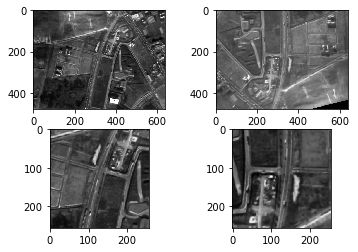

In [221]:
Iref = cv2.warpPerspective(Temp,A_ref,(wid,hei))
Icmp = cv2.warpPerspective(Temp,A_cmp,(wid,hei))
plt.subplot(2,2,1)
plt.imshow(Iref,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(Icmp,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(cropCenter(Iref,[nS,nS]),cmap='gray')
plt.subplot(2,2,4)
plt.imshow(cropCenter(Icmp,[nS,nS]),cmap='gray')
print(rdx,rdy,rCta,rS)

In [219]:
def cropCenter(Img,Size):
    hei,wid = Img.shape
    cy,cx = int(hei/2) ,int(wid/2) 
    sy,sx = int(Size[0]/2),int(Size[1]/2)
    #print(cy-sy,cy+sy,cx-sx,cx+sx)
    return Img[cy-sy:cy+sy,cx-sx:cx+sx]

112 368 192 448
112 368 192 448


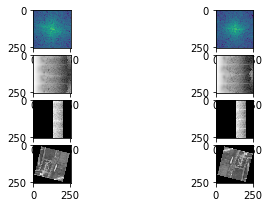

In [227]:
cIref=cropCenter(Iref,[nS,nS])
cIcmp=cropCenter(Icmp,[nS,nS])

cIref = cIref.astype(np.float32)
cIcmp = cIcmp.astype(np.float32)

Edisp = POC(cIref,cIcmp)

In [229]:
print('Ref')
print(rdx,rdy,rCta*180/math.pi,rS)
print('Estimated')
print(Edisp)

Ref
-15 37 -166.07106026542777 1.3073685849823282
Estimated
[-14.907135519919819, 37.022718346951038, -166.2189583969556, 1.296513496717122]
